In [1]:
# Importing necessary libraries
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the cleaned dataset
data = pd.read_csv("../data/processed/cleaned_data.csv")

# Clean column names (strip extra spaces if needed)
data.columns = data.columns.str.strip()

# Feature and target separation
X = data.drop('Churn Label', axis=1)  # Use the correct column name for target
y = data['Churn Label']  # Use the correct column name for target

# Check if there are any categorical columns to encode
categorical_columns = X.select_dtypes(include=['object']).columns

# Encoding categorical features using Label Encoding
label_encoder = LabelEncoder()
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Split data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier (you can choose another classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Optionally, save the trained model if needed
import joblib
joblib.dump(model, 'churn_model.pkl')


Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00      1009
         Yes       1.00      1.00      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



['churn_model.pkl']

In [7]:
# Apply Standard Scaling to the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [8]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [9]:
# Define parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required at a leaf node
}


In [10]:
# Grid search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,  # Number of folds in cross-validation
                           verbose=2,  # To display the progress of the search
                           n_jobs=-1)  # Use all processors to speed up search
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [12]:
import os
import joblib

# Create the directory if it doesn't exist
model_dir = "models"
os.makedirs(model_dir, exist_ok=True)

# Save the best model found during grid search
best_model = grid_search.best_estimator_
joblib.dump(best_model, os.path.join(model_dir, "best_churn_model.pkl"))

# Output best model's parameters
print(f"Best model saved with parameters: {grid_search.best_params_}")


Best model saved with parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Test Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00      1009
         Yes       1.00      1.00      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



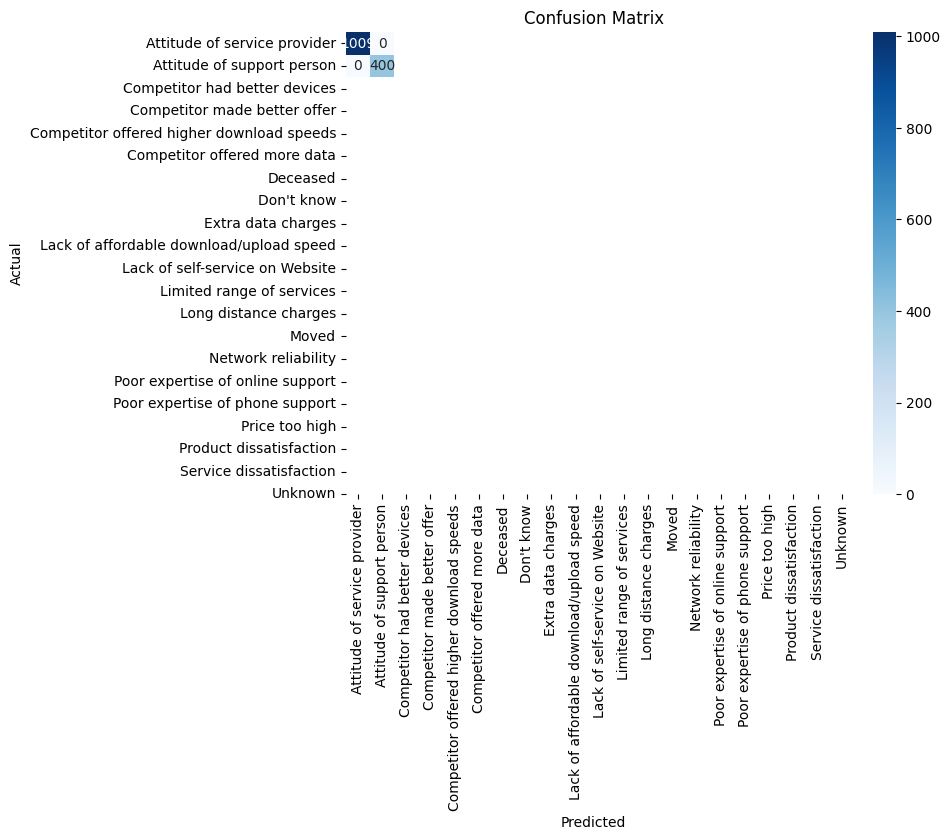

In [13]:
# Predict on test data
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Classification Report and Confusion Matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
